In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
from scipy import stats
from sklearn.cluster import KMeans

In [23]:
file_path1 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2014.sav"
data_set, meta = pyreadstat.read_sav(file_path1)
print("Columnas del dataset: ", data_set.columns)


Columnas del dataset:  Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU',
       'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ',
       'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ'],
      dtype='object')


In [24]:
_, meta = pyreadstat.read_sav(file_path1, metadataonly=True)

print("Columnas disponibles:", meta.column_names)
print("Descripciones:", meta.column_labels)

Columnas disponibles: ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU', 'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ']
Descripciones: ['Departamento de registro', 'Municipio de registro', 'Mes de registro', 'Año de registro', 'Dia de ocurrencia', 'Mes de ocurrencia', 'Departamento de ocurrencia', 'Municipio de ocurrencia', 'Edad del hombre', 'Edad de la mujer', 'Pueblo de pertenencia del hombre', 'Pueblo de pertenencia de la mujer', 'Nacionalidad del hombre', 'Nacionalidad de la mujer', 'Escolaridad del hombre', 'Escolaridad de la mujer', 'Ocupación (Subgrupos CIUO-08) del hombre', 'Ocupación (Subgrupos CIUO-08) de la mujer']


### Explorar un poco los datos que tienen

In [25]:
data_set, _ = pyreadstat.read_sav(file_path1, row_limit=5)
print(data_set)


   DEPREG MUPREG  MESREG  AÑOREG  DIAOCU  MESOCU  DEPOCU MUPOCU  EDADHOM  \
0    19.0   1901     7.0  2014.0     6.0     6.0    19.0   1901    999.0   
1    10.0   1001     4.0  2014.0    10.0     3.0    10.0   1001    999.0   
2     1.0   0101     9.0  2014.0     4.0     8.0     3.0   0301    999.0   
3     3.0   0309     1.0  2015.0     7.0     8.0     3.0   0309     30.0   
4    10.0   1001     5.0  2014.0     4.0     4.0    10.0   1001    999.0   

   EDADMUJ  PUEHOM  PUEMUJ  NACHOM  NACMUJ  ESCHOM  ESCMUJ   CIUOHOM   CIUOMUJ  
0    999.0     9.0     9.0    76.0   320.0     9.0     9.0        34      NEOG  
1    999.0     9.0     9.0    76.0   320.0     9.0     9.0  IGNORADO  IGNORADO  
2    999.0     4.0     4.0    76.0   320.0     9.0     9.0  IGNORADO  IGNORADO  
3     27.0     9.0     9.0   124.0   320.0     1.0     1.0        52      NEOG  
4    999.0     9.0     9.0   156.0   320.0     9.0     9.0        52      NEOG  


Cargar todas las bases de datos de los 10 años

In [26]:
file_path2 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2015.sav"
file_path3 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2016.sav"
file_path4 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2017.sav"
file_path5 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2018.sav"
file_path6 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2018.sav"
file_path7 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2020.sav"
file_path8 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2021.sav"
file_path9 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2022.sav"
file_path10 = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_2023.sav"

In [27]:
# Lista de archivos
data_files = [file_path1, file_path2, file_path3, file_path4, file_path5, 
              file_path6, file_path7, file_path8, file_path9, file_path10]

In [28]:
# Lista para almacenar los DataFrames
dataframes = []
meta = None

# Cargar cada archivo y almacenarlo
for file in data_files:
    df, meta = pyreadstat.read_sav(file)
    dataframes.append(df)

In [ ]:
# Asegurar que todas las columnas tienen el mismo orden
dataframes = [df.reindex(columns=dataframes[0].columns) for df in dataframes]

# Convertir columnas numéricas a float y sumar
combined_df = dataframes[0].copy()
for df in dataframes[1:]:
    for col in combined_df.columns:
        if pd.api.types.is_numeric_dtype(combined_df[col]):
            combined_df[col] = combined_df[col].fillna(0) + df[col].fillna(0)


# Eliminar filas con valores nulos
total_missing = combined_df.isnull().sum().sum()
print(f"Total de valores nulos en el dataset: {total_missing}")
combined_df = combined_df.dropna()


Total de valores nulos en el dataset: 0


In [55]:
# Restaurar los labels de las columnas
column_labels = dict(zip(meta.column_names, meta.column_labels))

In [64]:
# Mostrar resultado
print("Columnas del dataset:", combined_df.columns)
print("Columnas disponibles:", meta.column_names)
print("Descripciones:", meta.column_labels)
print(combined_df.head())

Columnas del dataset: Index(['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'DEPOCU',
       'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ',
       'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ', 'Cluster'],
      dtype='object')
Columnas disponibles: ['DEPREG', 'MUPREG', 'MESREG', 'AÑOREG', 'DIAOCU', 'MESOCU', 'AÑOOCU', 'DEPOCU', 'MUPOCU', 'EDADHOM', 'EDADMUJ', 'PUEHOM', 'PUEMUJ', 'NACHOM', 'NACMUJ', 'ESCHOM', 'ESCMUJ', 'CIUOHOM', 'CIUOMUJ']
Descripciones: ['Departamento de registro', 'Municipio de registro', 'Mes de registro', 'Año de registro', 'Dia de ocurrencia', 'Mes de ocurrencia', 'Año de ocurrencia', 'Departamento de ocurrencia', 'Municipio de ocurrencia', 'Edad del hombre', 'Edad de la mujer', 'Pueblo de pertenencia del hombre', 'Pueblo de pertenencia de la mujer', 'Nacionalidad del hombre', 'Nacionalidad de la mujer', 'Escolaridad del hombre', 'Escolaridad de la mujer', 'Ocupación (Subgrupos CIUO-08) del hombre', 'Ocupación (Subgrupos CIUO-08) 

In [65]:
# Guardar el resultado en un nuevo archivo .sav
output_path = "C:\\Users\\javie\\Documents\\UVG\\Cuarto año\\Primer Semestre\\Mineria\\Bases_P3_Mineria\\div_completo.sav"
pyreadstat.write_sav(combined_df, output_path, column_labels=column_labels)


Exploración de los datos

In [66]:
# Exploración de los datos
print("Dimensiones del dataset:", combined_df.shape)
print("Tipos de datos:")
print(combined_df.dtypes)

Dimensiones del dataset: (5575, 19)
Tipos de datos:
DEPREG     float64
MUPREG      object
MESREG     float64
AÑOREG     float64
DIAOCU     float64
MESOCU     float64
DEPOCU     float64
MUPOCU      object
EDADHOM    float64
EDADMUJ    float64
PUEHOM     float64
PUEMUJ     float64
NACHOM     float64
NACMUJ     float64
ESCHOM     float64
ESCMUJ     float64
CIUOHOM     object
CIUOMUJ     object
Cluster      int32
dtype: object


### Resumen estádistico del conjunto de datos

In [67]:
# Resumen estadístico
describe_numeric = combined_df.describe()
print("Resumen de variables numéricas:")
print(describe_numeric)

Resumen de variables numéricas:
            DEPREG       MESREG        AÑOREG       DIAOCU       MESOCU  \
count  5575.000000  5575.000000   5575.000000  5575.000000  5575.000000   
mean     62.345291    53.978655  16384.480897   128.328610    50.449148   
std      28.630844    23.363512   6263.482740    56.317428    22.123537   
min       3.000000     4.000000   6066.000000     5.000000     3.000000   
25%      39.000000    28.000000   6067.000000    69.000000    26.000000   
50%      61.000000    61.000000  20185.000000   143.000000    57.000000   
75%      83.000000    72.000000  20186.000000   171.000000    67.000000   
max     154.000000   108.000000  20192.000000   252.000000   100.000000   

            DEPOCU      EDADHOM      EDADMUJ       PUEHOM       PUEMUJ  \
count  5575.000000  5575.000000  5575.000000  5575.000000  5575.000000   
mean     63.677668  3398.306726  3423.287175    19.730762    20.001256   
std      28.342179  2091.003137  2077.309806     7.552815     7.600080

In [68]:
# Prueba de normalidad para algunas variables clave
for col in combined_df.select_dtypes(include=['float64', 'int64']).columns[:5]:
    stat, p = stats.shapiro(combined_df[col].dropna())
    print(f"Prueba de Shapiro-Wilk para {col}: p-value = {p}")

Prueba de Shapiro-Wilk para DEPREG: p-value = 1.4641988333911633e-25
Prueba de Shapiro-Wilk para MESREG: p-value = 9.993693027047541e-50
Prueba de Shapiro-Wilk para AÑOREG: p-value = 2.8084541805668077e-80
Prueba de Shapiro-Wilk para DIAOCU: p-value = 6.23795422286653e-46
Prueba de Shapiro-Wilk para MESOCU: p-value = 1.899784197450915e-47


C:\Users\javie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5575.
  res = hypotest_fun_out(*samples, **kwds)


In [69]:
# Tabla de frecuencia para variables categóricas
categorical_columns = combined_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Tabla de frecuencia para {col}:")
    print(combined_df[col].value_counts())


Tabla de frecuencia para MUPREG:
MUPREG
0101    1774
0901     134
0115     119
2101     107
1001      99
        ... 
1714       1
0705       1
0709       1
0915       1
1221       1
Name: count, Length: 288, dtype: int64
Tabla de frecuencia para MUPOCU:
MUPOCU
0101    1344
0108     209
0115     157
0901     150
0501     104
        ... 
1011       1
0706       1
1229       1
1206       1
1319       1
Name: count, Length: 301, dtype: int64
Tabla de frecuencia para CIUOHOM:
CIUOHOM
IGNORADO    1556
NEOG        1552
61           575
52           270
43           192
92           153
23           146
72            96
83            96
31            94
71            94
21            81
35            75
34            67
26            59
33            59
75            55
24            47
81            47
22            33
51            32
41            30
12            29
25            20
54            20
74            19
93            16
13             9
42             8
11             7
73  

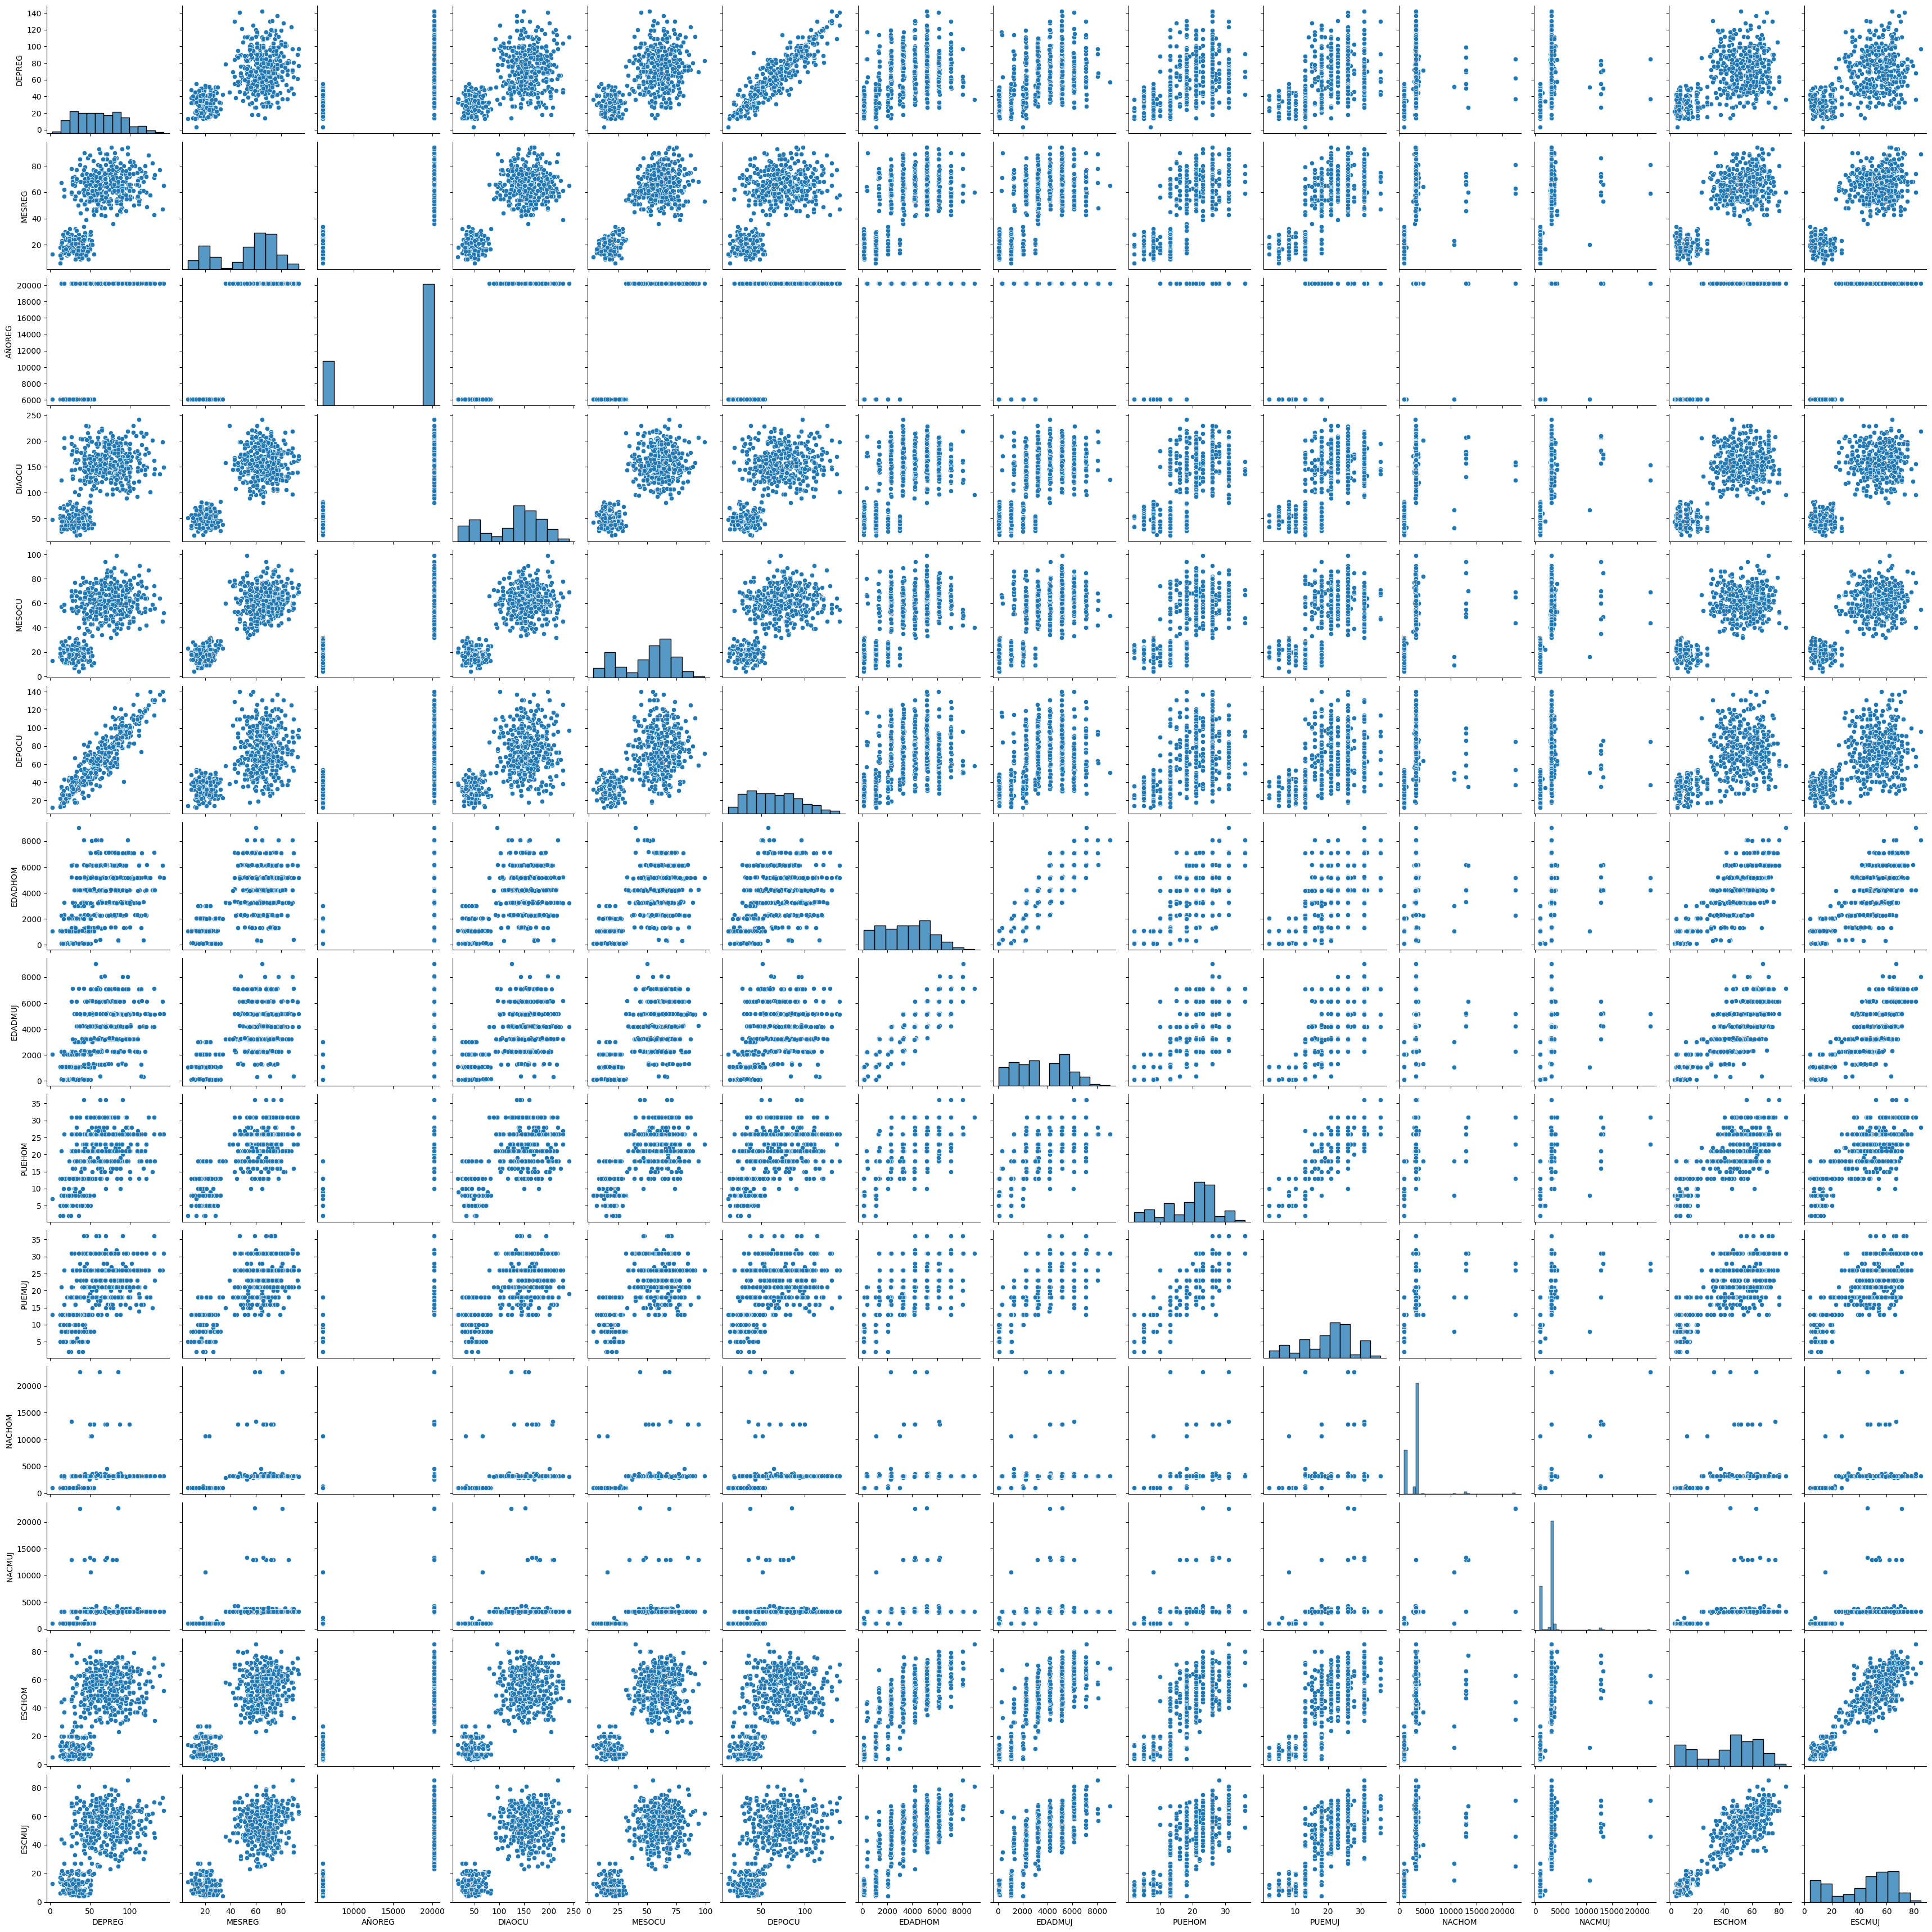

In [62]:
# Visualizaciones
sns.pairplot(combined_df.select_dtypes(include=['float64', 'int64']).sample(500))
plt.show()

In [63]:
# Clustering (K-Means)
num_clusters = 3
clustering_vars = combined_df.select_dtypes(include=['float64', 'int64']).fillna(0)
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
combined_df['Cluster'] = kmeans.fit_predict(clustering_vars)
print("Centroides de los clusters:", kmeans.cluster_centers_)

Centroides de los clusters: [[7.41290242e+01 6.67000250e+01 2.01859980e+04 1.58341902e+02
  6.23134515e+01 7.53151984e+01 4.29292887e+03 4.32371650e+03
  2.33117045e+01 2.35742451e+01 3.27259845e+03 3.27845021e+03
  5.37616671e+01 5.37436985e+01]
 [3.05956029e+01 1.94123917e+01 6.06644370e+03 4.68847435e+01
  1.81805463e+01 3.23131246e+01 9.40712858e+02 9.52003997e+02
  9.96802132e+00 1.02225183e+01 1.02042438e+03 1.01131579e+03
  1.14630247e+01 1.24623584e+01]
 [6.88955224e+01 6.75522388e+01 2.01858955e+04 1.57940299e+02
  6.38059701e+01 7.03432836e+01 4.95200000e+03 4.93635821e+03
  2.42835821e+01 2.53880597e+01 1.41928358e+04 1.60979701e+04
  5.94179104e+01 5.74776119e+01]]
